# Feature Engineering

In [37]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
data_path = "data/smartwatches.csv"
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
train_df = df.sample(frac=0.8, random_state=42)
train_df = train_df.reset_index()
test_df = df.drop(train_df.index)
test_df = test_df.reset_index()

In [39]:
df.shape, train_df.shape, test_df.shape

((450, 16), (360, 17), (90, 17))

In [40]:
train_df.head()

,index,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,407,407,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7 inches,NaN
1,444,444,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4 inches,NaN
2,117,117,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9 inches,75g +
3,30,30,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
4,415,415,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6 inches,NaN


In [41]:
train_df.drop(['index','Unnamed: 0'], axis=1, inplace=True)
# inplace=True means that the changes are made in the original dataframe
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7 inches,NaN
1,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4 inches,NaN
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9 inches,75g +
3,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6 inches,NaN


We can extract the numerical data in display size and weight

In [42]:
print(f"No. of null elements in Display Size Column: ",train_df['Display Size'].isna().sum())
print(f"No. of elements categories in Column: ",train_df['Display Size'].value_counts())
print(f"No. of unique values in Display Size Column: ",train_df['Display Size'].value_counts().count())


No. of null elements in Display Size Column:  27
No. of elements categories in Column:  Display Size
1.7 inches     56
1.3 inches     50
1.8 inches     48
1.4 inches     35
0.1 inches     28
1.6 inches     25
1.9 inches     21
1.2 inches     17
1.1 inches      6
1.5 inches      6
0.2 inches      6
4.3 inches      4
0.9 inches      4
2.7 inches      2
4.4 inches      2
4.5 inches      2
3.3 inches      2
2.0 inches      2
1.0 inches      2
2.3 inches      1
35.9 inches     1
18.5 inches     1
0.0 inches      1
27.9 inches     1
3.0 inches      1
4.0 inches      1
2.1 inches      1
6.9 inches      1
2.4 inches      1
15.9 inches     1
3.5 inches      1
0.6 inches      1
0.5 inches      1
20.0 inches     1
Name: count, dtype: int64
No. of unique values in Display Size Column:  34


In [43]:
train_df['Display Size'].fillna('0.0 inches',inplace=True)
#it replaces the NaN values in the column with '0.0 inches'
#inplace=True means that the changes are made in the original dataframe

train_df ['Display Size'].isna().sum()

/tmp/ipykernel_5819/2332630788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].fillna('0.0 inches',inplace=True)


np.int64(0)

In [44]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))
train_df['Display Size'].head() #can see inches removed and NaN(eg. 4th row) filled

0    2.7
1    1.4
2    1.9
3    0.0
4    1.6
Name: Display Size, dtype: float64

But we can't keep 0 as display size. Gives incorrect values. So have to fill with null values

In [45]:
train_df['Display Size'].replace(0.0,np.nan,inplace=True)
print(f"No. of null elements in Display Size Column: ",train_df['Display Size'].isna().sum())

No. of null elements in Display Size Column:  28


/tmp/ipykernel_5819/621962736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0,np.nan,inplace=True)


In [46]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    63
75g +        58
35 - 50 g    45
<= 20 g      30
50 - 75 g    15
Name: count, dtype: int64

Will have to get the mean value for ranges

In [47]:
cal = sum([int(x) for x in re.findall('\d+','20 - 35 g')])/2
train_df['Weight'].replace('20 - 35 g',cal, inplace=True)
train_df['Weight'].value_counts()

/tmp/ipykernel_5819/2842114934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('20 - 35 g',cal, inplace=True)


Weight
27.5         63
75g +        58
35 - 50 g    45
<= 20 g      30
50 - 75 g    15
Name: count, dtype: int64

In [48]:
cal = sum([int(x) for x in re.findall('\d+','35 - 50 g')])/2
train_df['Weight'].replace('35 - 50 g',cal, inplace=True)

/tmp/ipykernel_5819/1025587379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('35 - 50 g',cal, inplace=True)


In [49]:
cal = sum([int(x) for x in re.findall('\d+','50 - 75 g')])/2
train_df['Weight'].replace('50 - 75 g',cal, inplace=True)

/tmp/ipykernel_5819/3185377469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('50 - 75 g',cal, inplace=True)


In [50]:
train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]), inplace=True)

/tmp/ipykernel_5819/1754904084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]), inplace=True)


In [51]:
train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]), inplace=True)

/tmp/ipykernel_5819/655051738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]), inplace=True)
/tmp/ipykernel_5819/655051738.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Weight'].replace('<= 20 g',float(re.

In [52]:
train_df['Weight'].value_counts()

Weight
27.5    63
75.0    58
42.5    45
20.0    30
62.5    15
Name: count, dtype: int64

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                360 non-null    object 
 1   Current Price        354 non-null    float64
 2   Original Price       304 non-null    float64
 3   Discount Percentage  304 non-null    float64
 4   Rating               356 non-null    float64
 5   Number OF Ratings    315 non-null    float64
 6   Model Name           330 non-null    object 
 7   Dial Shape           260 non-null    object 
 8   Strap Color          260 non-null    object 
 9   Strap Material       304 non-null    object 
 10  Touchscreen          329 non-null    object 
 11  Battery Life (Days)  330 non-null    float64
 12  Bluetooth            355 non-null    object 
 13  Display Size         332 non-null    float64
 14  Weight               211 non-null    float64
dtypes: float64(8), object(7)
memory usage: 4

Removing discount which is a percentage and adding as a new column price

In [54]:
train_df['Discount Price'] = (train_df['Original Price'] * (-train_df['Discount Percentage']))/100
train_df.drop(['Discount Percentage'],axis=1, inplace=True)

### Numerical Data

In [55]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [56]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,2949.0,4199.0,3.1,10.0,NaN,2.7,NaN,-1250.000000
1,6999.0,15999.0,2.6,NaN,8.0,1.4,NaN,-8999.999999
2,2499.0,11999.0,4.1,1990.0,8.0,1.9,75.0,-9500.000000
3,1999.0,7990.0,3.6,827.0,8.0,NaN,75.0,-5991.000000
4,2299.0,5999.0,2.5,24.0,22.0,1.6,NaN,-3700.000000


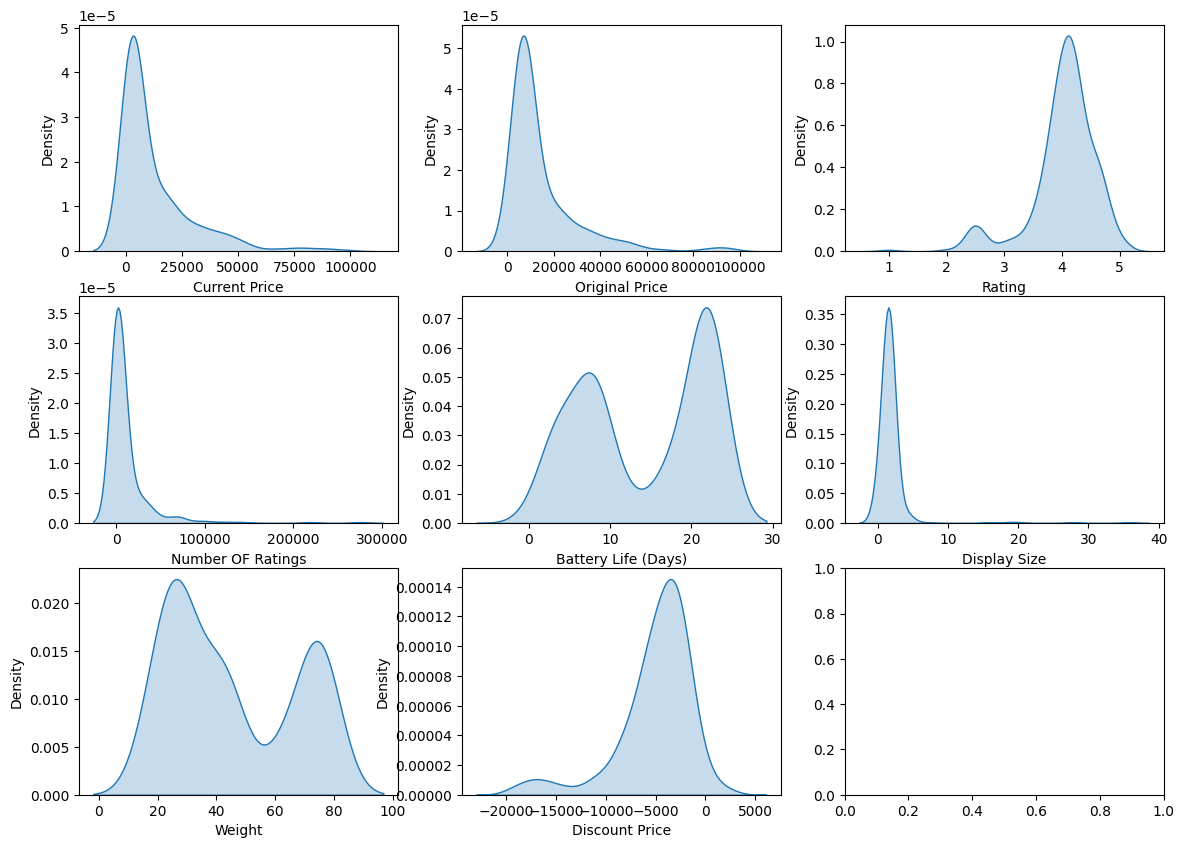

In [57]:
#Density Plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))

for i, column in enumerate(numerical_col):
    row = i//3
    col = i%3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[column], ax=ax, fill=True)

plt.show()

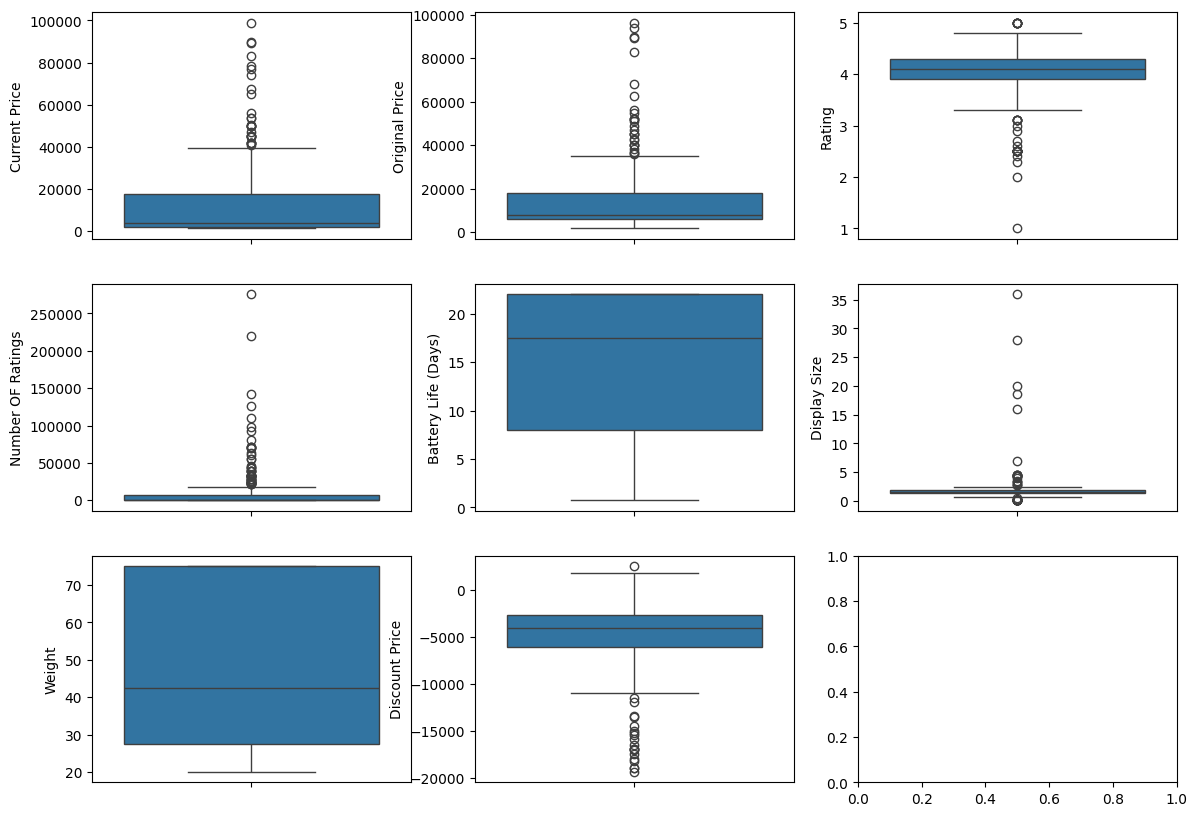

In [58]:
#Box Plot for outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))

for i, column in enumerate(numerical_col):
    row = i//3
    col = i%3
    ax = axes[row, col]
    sns.boxplot(data=train_df[column], ax=ax)

plt.show()

We have to remove outliers and null values

In [59]:
def remove_outliers_IQR(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3- Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

#it calculates the IQR(Interquartile Range) of the column
#any data point that is below the lower bound or above the upper bound is considered an outlier
#it is not a good method to use when you have a small dataset or when you want to remove extreme outliers
#it is also not a good method to use when you have a dataset that is not normally distributed

In [60]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [61]:
import_col = ['Current Price','Original Price', 'Rating', 'Number OF Ratings','Display Size']
for col in import_col:
    train_df = remove_outliers_IQR(train_df,col)

In [62]:
for col in numerical_col:
    print(col)
    train_df[col].fillna(train_df[col].median(), inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


/tmp/ipykernel_5819/1658619530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
/tmp/ipykernel_5819/1658619530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [63]:
train_df.shape

(143, 15)

In [64]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             56
Strap Color            56
Strap Material         23
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [65]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
2,2499.0,11999.0,4.1,1990.0,8.0,1.9,75.0,-9500.0
5,2499.0,6999.0,4.3,3944.0,22.0,1.9,42.5,-4500.0
6,3499.0,5999.0,4.2,1785.0,22.0,1.8,75.0,-2500.0
12,2126.0,5999.0,3.7,18.0,8.0,1.9,27.5,-3873.0
19,11499.0,18999.0,3.9,406.0,12.5,1.4,42.5,-7500.0


The columns have data in various ranges of 10s, 100s, 1000s, etc, We have to normalize these.

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#it scales the data between 0 and 1
#it is useful when you have a dataset that is not normally distributed

In [67]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])
data = pd.DataFrame(data,columns=numerical_col[:-1])

In [68]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.065657,0.468356,0.666667,0.059470,0.341176,0.666667,1.000000
1,0.065657,0.237206,0.833333,0.117952,1.000000,0.666667,0.409091
2,0.116162,0.190976,0.750000,0.053334,1.000000,0.583333,1.000000
3,0.046818,0.190976,0.333333,0.000449,0.341176,0.666667,0.136364
4,0.520202,0.791965,0.500000,0.012062,0.552941,0.250000,0.409091


In [69]:
data.shape, train_df.shape

((143, 7), (143, 15))

In [70]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
2,fire-boltt,BSW070,NaN,NaN,NaN,Yes,Yes,-9500.0
5,noise,"ColorFit Loop Advanced BT Calling with 1.85"" d...",Square,Grey,Silicon,Yes,Yes,-4500.0
6,dizo,Watch D Talk 1.8 display with calling&7 day ba...,Rectangle,Grey,Silicon,Yes,Yes,-2500.0
12,dizo,NaN,NaN,NaN,NaN,Yes,Yes,-3873.0
19,honor,MUS-B19,NaN,NaN,NaN,Yes,Yes,-7500.0


In [71]:
train_df = pd.concat([train_df, data], axis=1)
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
2,fire-boltt,BSW070,NaN,NaN,NaN,Yes,Yes,-9500.0,0.116162,0.190976,0.750000,0.053334,1.000000,0.583333,1.000000
5,noise,"ColorFit Loop Advanced BT Calling with 1.85"" d...",Square,Grey,Silicon,Yes,Yes,-4500.0,0.005051,0.375896,0.750000,0.771609,0.341176,0.500000,0.409091
6,dizo,Watch D Talk 1.8 display with calling&7 day ba...,Rectangle,Grey,Silicon,Yes,Yes,-2500.0,0.065657,0.375896,0.750000,0.697324,0.129412,0.583333,0.772727
12,dizo,NaN,NaN,NaN,NaN,Yes,Yes,-3873.0,0.166667,0.260321,0.333333,0.000000,1.000000,0.500000,0.409091
19,honor,MUS-B19,NaN,NaN,NaN,Yes,Yes,-7500.0,0.106061,0.190976,0.583333,0.002963,0.552941,0.166667,1.000000


In [72]:
train_df[numerical_col]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
2,0.116162,0.190976,0.750000,0.053334,1.000000,0.583333,1.000000,-9500.0
5,0.005051,0.375896,0.750000,0.771609,0.341176,0.500000,0.409091,-4500.0
6,0.065657,0.375896,0.750000,0.697324,0.129412,0.583333,0.772727,-2500.0
12,0.166667,0.260321,0.333333,0.000000,1.000000,0.500000,0.409091,-3873.0
19,0.106061,0.190976,0.583333,0.002963,0.552941,0.166667,1.000000,-7500.0
...,...,...,...,...,...,...,...,...
132,0.545000,0.837779,0.833333,0.037891,0.341176,0.250000,0.409091,NaN
135,0.292929,0.375896,0.000000,0.000509,0.788235,0.083333,0.409091,NaN
136,0.030303,0.190976,0.750000,0.972764,1.000000,0.333333,0.409091,NaN
137,0.040404,0.098516,0.500000,0.104424,1.000000,0.416667,0.136364,NaN
